 # Obtain a typical day's demand profile from the 10 minute data

Import packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
%matplotlib inline

Import the electricity csv and group by dates

In [5]:
data_10min = pd.read_csv('electricity_10min.csv')
#create an energy column in kW 
data_10min['Energy/kWh'] = data_10min['Watt']*(1/6000)
#create a month column and time column
#first convert dt column to datetime format
data_10min['dt'] = pd.to_datetime(data_10min['dt'], format = '%Y-%m-%d %H:%M:%S')
data_10min['Month'] = data_10min['dt'].dt.month
data_10min['DayofYear'] = data_10min['dt'].dt.dayofyear
data_10min['Time'] = data_10min['dt'].dt.time

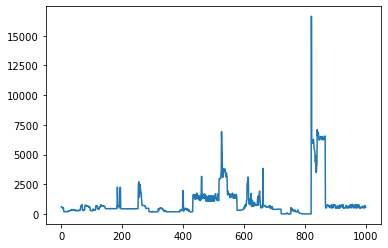

In [8]:
data_10min.head(100)
plt.plot(data_10min['Watt'].head(1000))

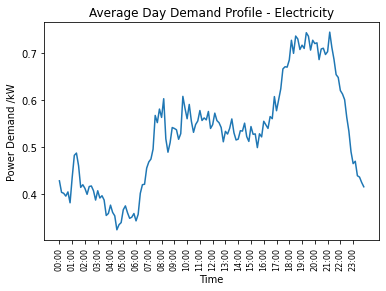

16642.4

In [10]:
#average day over all electricity data:
anydayE = data_10min.groupby(pd.Grouper(key='Time')).mean()
timeE = anydayE.index
timeE = [x.strftime("%H:%M") for x in timeE]
plt.plot(timeE, anydayE['Watt']/1000)
plt.xticks(timeE[::6], fontsize=8, rotation=90)
plt.title('Average Day Demand Profile - Electricity')
plt.xlabel('Time')
plt.ylabel('Power Demand /kW')
plt.show()
overallkWhE = anydayE['Energy/kWh'].sum()
peakE = max(data_10min['Watt'])
peakE

The data gives an average daily usage of 12.66kWh/household.
The demand figure we are using gives a 22.23kWh/household as the daily usage. 
Our demand has - 9.4GWh general electricity, 8.5GWh from EVs, 9.9-10.6GWh heating giving 7.36, 6.65 & 7.75-8.30 kWh/household daily respecitvely. 

Same for gas: 

In [11]:
gas = pd.read_csv('sample_gas')

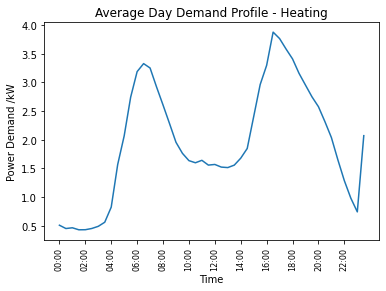

94.16232147889158

In [12]:
gas['ADVANCEDATETIME'] = pd.to_datetime(gas['ADVANCEDATETIME'], format = '%Y-%m-%d %H:%M:%S')
gas['Month'] = gas['ADVANCEDATETIME'].dt.month
gas['DayofYear'] = gas['ADVANCEDATETIME'].dt.dayofyear
gas['Time'] = gas['ADVANCEDATETIME'].dt.time
gas['Power'] = gas['GASKWH']*2


#average day over all data:
anydayG = gas.groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
timeG = anydayG.index
timeG = [x.strftime("%H:%M") for x in timeG]
plt.plot(timeG, anydayG)
plt.xticks(timeG[::4], fontsize=8, rotation=90)
plt.title('Average Day Demand Profile - Heating')
plt.xlabel('Time')
plt.ylabel('Power Demand /kW')
plt.show()
overallkWhG = anydayG.sum()
overallkWhG

The data gives an average daily usage of 47.08kWh/household. The demand figure we are using gives a 22.23kWh/household as the daily usage. Our demand has - 9.4GWh general electricity, 8.5GWh from EVs, 9.9-10.6GWh heating giving 7.36, 6.65 & 7.75-8.30 kWh/household daily respecitvely.
Taking the heating demand as 8kWh/household daily we will scale the data by 8/47 to create the summer and winter graphs. 

In [13]:
#ELECTRICITY PER MONTH

byMonthE = data_10min.groupby(pd.Grouper(key='Month'))
groups = dict(list(byMonthE))
JanE = groups[1].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
FebE = groups[2].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
MarE = groups[3].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
AprE = groups[4].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
MayE = groups[5].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
JuneE = groups[6].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
JulyE = groups[7].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
AugE = groups[8].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
SeptE = groups[9].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
OctE = groups[10].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
NovE = groups[11].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
DecE = groups[12].groupby(pd.Grouper(key='Time')).mean()['Watt'].sort_index()
winter1E = pd.concat([DecE, JanE, FebE], axis=1)
summer1E = pd.concat([JuneE, JulyE, AugE], axis=1)
winter1E

,Watt,Watt,Watt
Time,,,
00:00:00,410.114616,309.851508,511.894064
00:10:00,401.167492,314.290356,493.429698
00:20:00,365.511587,301.337792,507.510769
00:30:00,383.597914,297.569053,597.994289
00:40:00,498.687049,290.417383,565.250059
...,...,...,...
23:10:00,484.642548,430.147256,470.594273
23:20:00,434.816362,343.587892,513.418753
23:30:00,411.395807,337.501347,497.917112


In [14]:
winterE =  winter1E.mean(axis=1)*7.36/12.66
summerE = summer1E.mean(axis=1)*7.36/12.66
winterE

Time
00:00:00    238.717509
00:10:00    234.265728
00:20:00    227.574794
00:30:00    247.883803
00:40:00    262.455215
               ...    
23:10:00    268.468320
23:20:00    250.337476
23:30:00    241.615403
23:40:00    232.793383
23:50:00    234.425870
Length: 144, dtype: float64

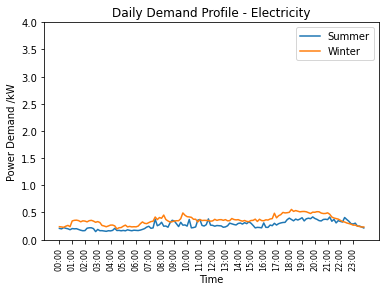

Household demand total: Summer = 6441.68 kWh/day, Winter = 8642.48 kWh/day.


3.3390660184064274

In [15]:
#plot summer and winter average day for electricity
plt.plot(timeE, summerE/1000, timeE, winterE/1000)
plt.xticks(timeE[::6], fontsize=8, rotation=90)
plt.legend(['Summer', 'Winter'])
plt.title('Daily Demand Profile - Electricity')
plt.xlabel('Time')
plt.ylabel('Power Demand /kW')
plt.ylim([0,4])
plt.show()
summerkWhE = summerE.sum()/6
winterkWhE = winterE.sum()/6
summerkWhE, winterkWhE
print('Household demand total: Summer = %.2f kWh/day, Winter = %.2f kWh/day.' % (summerkWhE, winterkWhE))
peak_elec = max(winterE)*6/1000
peak_elec

In [17]:
#gas per month
byMonthG = gas.groupby(pd.Grouper(key='Month'))
groupG = dict(list(byMonthG))


In [18]:
JanG = groupG[1].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
FebG = groupG[2].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
MarG = groupG[3].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
AprG = groupG[4].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
MayG = groupG[5].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
JuneG = groupG[6].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
JulyG = groupG[7].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
AugG = groupG[8].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
SeptG = groupG[9].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
OctG = groupG[10].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
NovG = groupG[11].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
DecG = groupG[12].groupby(pd.Grouper(key='Time')).mean()['Power'].sort_index()
winter1G = pd.concat([DecG, JanG, FebG], axis=1)
summer1G = pd.concat([JuneG, JulyG, AugG], axis=1)

In [19]:
winterG =  winter1G.mean(axis=1)*8/47
summerG = summer1G.mean(axis=1)*8/47
winterG[47] = (winterG[0]+winterG[46])/2
winterG.mean(axis=0)

0.6719139242610929

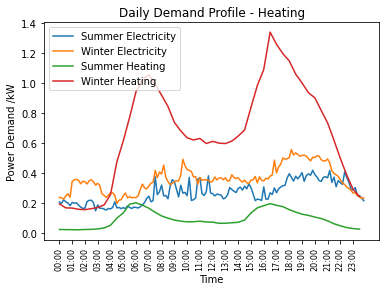

Household demand total: Summer = 6446.26 kWh/day, Winter = 8674.73 kWh/day.


In [20]:
#plot average summer and winter days for electricity and gas together
plt.plot(timeE, summerE/1000, timeE, winterE/1000, timeG, summerG, timeG, winterG)
plt.xticks(timeG[::2], fontsize=8, rotation=90)
plt.legend(['Summer Electricity', 'Winter Electricity','Summer Heating', 'Winter Heating'])
plt.title('Daily Demand Profile - Heating')
plt.xlabel('Time')
plt.ylabel('Power Demand /kW')
plt.show()
summerkWhG = summerG.sum()
winterkWhG = winterG.sum()
print('Household demand total: Summer = %.2f kWh/day, Winter = %.2f kWh/day.' % (summerkWhG+summerkWhE, winterkWhG+winterkWhE))

Heat pumps will have a different profile to gas boilers as it is to do with whether the pump itself is on or off, will have same integrated area but flatter profile.

Spike at 11:30pm for gas is when the smart meter is applying standing charges

In [21]:
#plot a yearly profile with this data:
gas_year = gas.groupby(by=['DayofYear']).mean()

In [22]:
gas.head()

,Unnamed: 0,ANON_ID,ADVANCEDATETIME,HH,GASKWH,Month,DayofYear,Time,Power
0,0,4396,2008-08-03 14:30:00,29,0.01,8,216,14:30:00,0.02
1,1,8439,2009-04-05 02:30:00,5,0.00,4,95,02:30:00,0.00
2,2,14804,2009-05-08 07:30:00,15,0.20,5,128,07:30:00,0.40
3,3,13707,2009-03-12 04:00:00,8,0.00,3,71,04:00:00,0.00
4,4,10462,2010-05-12 12:00:00,24,0.00,5,132,12:00:00,0.00


Text(0, 0.5, 'Daily Energy Demand /kWh')

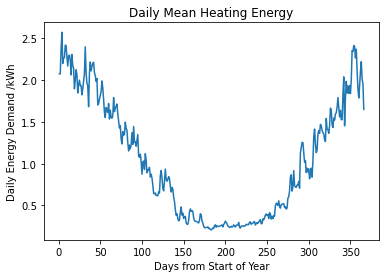

In [33]:
plt.plot(gas_year.index, gas_year['GASKWH'])
plt.title('Daily Mean Heating Energy')
plt.xlabel('Days from Start of Year')
plt.ylabel('Daily Energy Demand /kWh')

In [28]:
#Find peak heat demand: 
peak_gas_power = max(gas_year['Power'])*1.37
EV = 0.277

In [34]:
higher = peak_gas_power+(peakE*(7.36/(1000*12.66)))+EV

In [35]:
lower = peak_gas_power+peak_elec+EV

In [37]:
3500*higher, 3500*lower

(59513.835073709066, 37337.35729137009)